<a href="https://colab.research.google.com/github/Monsoon886-cyb/ML-Codes/blob/main/Ml_proj_on_adult_income_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline ,make_pipeline

In [ ]:
df = fetch_openml(name='adult', version=2, as_frame = True)
x= df.data.drop(['marital-status','relationship','fnlwgt','race','sex','education-num'], axis=1)
y= df.target
x.sample(6)

,age,workclass,education,occupation,capital-gain,capital-loss,hours-per-week,native-country
9244,21,State-gov,HS-grad,Craft-repair,0,0,12,United-States
16797,25,Private,Some-college,Adm-clerical,0,0,20,United-States
16425,70,Private,Some-college,Tech-support,0,0,40,United-States
22173,21,Private,HS-grad,Adm-clerical,0,0,45,United-States
31519,73,NaN,Bachelors,NaN,0,0,30,United-States
19031,47,Private,Assoc-voc,Sales,0,0,50,United-States


In [ ]:
x.isnull().sum()

,0
age,0
workclass,2799
education,0
occupation,2809
capital-gain,0
capital-loss,0
hours-per-week,0
native-country,857


<ipython-input-90-462cd26f449b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['capital-gain'])
<ipython-input-90-462cd26f449b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['capital-loss'])


<Axes: xlabel='capital-loss', ylabel='Density'>

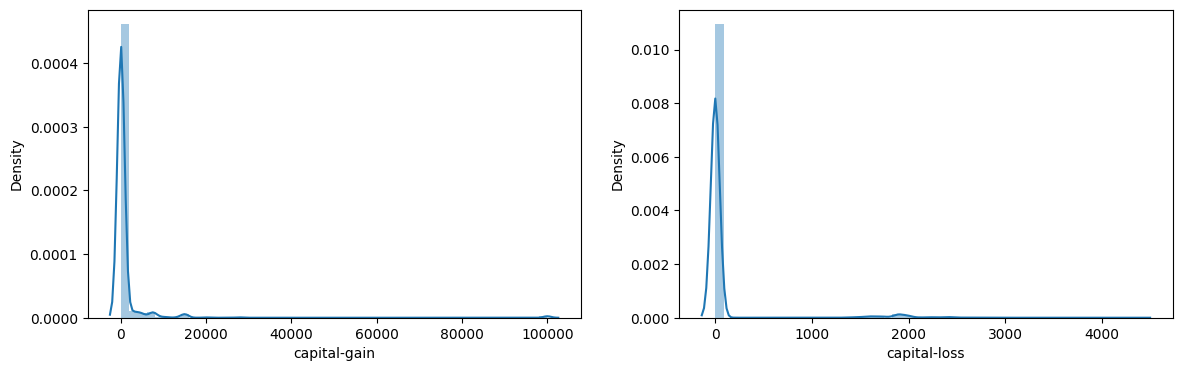

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x['capital-gain'])

plt.subplot(122)
sns.distplot(x['capital-loss'])

In [ ]:
#Test Train split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
#Imputing
trf1= ColumnTransformer([
    ('im_workclass',SimpleImputer(strategy ='most_frequent'),[1]),
    ('im_occupation',SimpleImputer(strategy ='most_frequent'),[3]),
    ('nat_con',SimpleImputer(strategy ='most_frequent'),[7])

], remainder = 'passthrough')

In [ ]:
#Categorical to num
trf2= ColumnTransformer([
    ('en_workclass', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[1]),
    ('en_occupation', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[3]),
    ('en_native-country', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[7]),
    ('en_education', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[2])
],remainder='passthrough')

In [ ]:
#Function Transformer
trf3 = ColumnTransformer([
    ('cap_gain_t', FunctionTransformer(lambda x: np.log1p(x.astype(float))),[4]),
    ('cap_loss_t', FunctionTransformer(lambda x: np.log1p(x.astype(float))),[5])
],remainder='passthrough')

In [ ]:
#Feature Scaling
trf4= ColumnTransformer([
    ('scale', MinMaxScaler(),slice(0,7))
])

In [ ]:
#Train Model
trf5 = LogisticRegression()

In [ ]:
pipe=Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('im_workclass',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('im_occupation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3]),
                                                 ('nat_con',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [7])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('en_workclass',
                                                  OneHotEn...
                                                  [2])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cap_gain_t',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f7e2f7b7600>),
                                                  [4]),
                                                 ('cap_loss_t',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f7e2f7b79c0>),
                                                  [5])])),
                ('trf4',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf5', LogisticRegression())])

In [ ]:
pred=pipe.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.762809029021856